In [1]:
from pymol import cmd
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


from pymol import cmd, CmdException


def get_raw_distances(names='', state=1, selection='all', quiet=1):
    '''
DESCRIPTION

    Get the list of pair items from distance objects. Each list item is a
    tuple of (index1, index2, distance).

    Based on a script from Takanori Nakane, posted on pymol-users mailing list.
    http://www.mail-archive.com/pymol-users@lists.sourceforge.net/msg10143.html

ARGUMENTS

    names = string: names of distance objects (no wildcards!) {default: all
    measurement objects}

    state = integer: object state {default: 1}

    selection = string: atom selection {default: all}

SEE ALSO

    select_distances, cmd.find_pairs, cmd.get_raw_alignment
    '''
    from chempy import cpv

    state, quiet = int(state), int(quiet)
    if state < 1:
        state = cmd.get_state()

    valid_names = cmd.get_names_of_type('object:measurement')
    if names == '':
        names = ' '.join(valid_names)
    else:
        for name in names.split():
            if name not in valid_names:
                print(' Error: no such distance object: ' + name)
                raise CmdException

    raw_objects = cmd.get_session(names, 1, 1, 0, 0)['names']

    xyz2idx = {}
    cmd.iterate_state(state, selection, 'xyz2idx[x,y,z] = (model,index)',
                      space=locals())

    r = []
    for obj in raw_objects:
        try:
            points = obj[5][2][state - 1][1]
            if points is None:
                raise ValueError
        except (KeyError, ValueError):
            continue
        for i in range(0, len(points), 6):
            xyz1 = tuple(points[i:i + 3])
            xyz2 = tuple(points[i + 3:i + 6])
            try:
                r.append((xyz2idx[xyz1], xyz2idx[xyz2], cpv.distance(xyz1, xyz2)))
                if not quiet:
                    print(' get_raw_distances: ' + str(r[-1]))
            except KeyError:
                if quiet < 0:
                    print(' Debug: no index for %s %s' % (xyz1, xyz2))
    return r

In [2]:
avaiable_DF = pd.read_csv("available_result.csv")

In [3]:
hbond_A501_list = []
hbond_3DAC_list = []
for i in range(avaiable_DF.shape[0]):
    cmd.load("A501/A501_summary/%s/relaxed_model_1.pdb"%avaiable_DF["A501_sequence_id"][i],"%s_1"%avaiable_DF["A501_sequence_id"][i])
    cmd.distance("hbond","all","all",mode=2)
    hbond_A501_list.append(len(get_raw_distances("hbond")))
    cmd.reinitialize()

    cmd.load("3DAC/3DAC_summary/%s/relaxed_model_1.pdb"%avaiable_DF["3DAC_sequence_id"][i],"%s_1"%avaiable_DF["3DAC_sequence_id"][i])
    cmd.distance("hbond","all","all",mode=2)
    hbond_3DAC_list.append(len(get_raw_distances("hbond")))
    cmd.reinitialize()

    print(i,end=",")

 PyMOL not running, entering library mode (experimental)
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,2

In [4]:
hbond_A501_list_2 = []
hbond_3DAC_list_2 = []
for i in range(avaiable_DF.shape[0]):
    cmd.load("A501/A501_summary/%s/relaxed_model_2.pdb"%avaiable_DF["A501_sequence_id"][i],"%s_1"%avaiable_DF["A501_sequence_id"][i])
    cmd.distance("hbond","all","all",mode=2)
    hbond_A501_list_2.append(len(get_raw_distances("hbond")))
    cmd.reinitialize()

    cmd.load("3DAC/3DAC_summary/%s/relaxed_model_2.pdb"%avaiable_DF["3DAC_sequence_id"][i],"%s_1"%avaiable_DF["3DAC_sequence_id"][i])
    cmd.distance("hbond","all","all",mode=2)
    hbond_3DAC_list_2.append(len(get_raw_distances("hbond")))
    cmd.reinitialize()

    print(i,end=",")

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,

In [5]:
avaiable_DF["A501_hydrogen_bond"] = hbond_A501_list
avaiable_DF["3DAC_hydrogen_bond"] = hbond_3DAC_list
avaiable_DF.to_csv("available_result.csv",index=False)

In [6]:
avaiable_DF

,A501_sequence_id,A501_sequence_name,A501_sequence,A501_structure_status,3DAC_sequence_name,3DAC_sequence_id,3DAC_sequence,A501_structure_model_1_score,A501_structure_model_2_score,3DAC_structure_status,...,disulfide_bond_diff,A501_secondary_structure_H_Part,A501_secondary_structure_S_Part,A501_secondary_structure_L_Part,3DAC_secondary_structure_H_Part,3DAC_secondary_structure_S_Part,3DAC_secondary_structure_L_Part,Function_tag,A501_Surface,3DAC_Surface
0,A501_001,WP_011250482.1,MAKKGAGATRGISPVRPTRALPIGAYLKVADNSGAKVIQIIGVVGY...,True,Chromosome1_1050,3DAC_210,MVRPYSRLKIADNSGVKEIQVIRVIGNLQDDALNPNVKIWGTVGDI...,90.681015,90.474789,True,...,0,0.106383,0.347518,0.546099,0.092308,0.392308,0.515385,Biological process,16448.005859,15269.047852
1,A501_002,WP_042692804.1,MGKSLIQQRRGKGTTTFRAPSHRYRGAVKYVPLNVVKEKTLRGVVE...,True,Chromosome1_1057,3DAC_211,MGIKKFKPTTPGRRHMTVLDFSEITKTEPEKSLVVTKKSTGGRNNQ...,94.120890,93.913161,True,...,0,0.142259,0.255230,0.602510,0.089606,0.225806,0.684588,Biological process,28280.498047,33269.261719
2,A501_003,WP_042693005.1,MKVVRFGVSVPEELLEKFDRIIEEKGYVNRSEAIRDLMRDFIIRHE...,True,Chromosome1_210,3DAC_024,MRFTVSVDDEIGAFIDSLVKEYGYASRSELIRDLAREKKAELEVGD...,95.654313,95.708373,True,...,0,0.420290,0.282609,0.297101,0.461538,0.292308,0.246154,Biological process,16841.468750,15671.269531
3,A501_004,WP_050001839.1,MDCTKDYCVKDLSLATSGEKKIDWVSRFMPVLQTIRREFEREKPFK...,True,Chromosome1_1121,3DAC_224,MAHVKDISLAPHGWKKINWVKAHMKVMPLVKKRLDEKGIFKGVRIG...,96.819289,96.925328,True,...,1,0.508314,0.168646,0.323040,0.516990,0.150485,0.332524,Biosynthesis and metabolism,49283.140625,47743.734375
4,A501_005,WP_050001842.1,MRRDYTLYLFASLGSFLIAYIALPLVIIFAKQLMDWEMLVKTLHDP...,True,Chromosome1_359,3DAC_056,MLRFFATLLAFIILLPFLGLSIYTTPSELWHALTNPDVLDALKNSF...,95.500631,95.463742,True,...,0,0.878543,0.000000,0.121457,0.848000,0.000000,0.152000,Transporter,28950.642578,29098.843750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,A501_299,WP_050003989.1,MELLKLNVVPCRFIERLNRFVALVEVGGDVRKALVTNTGRLEEFMI...,True,Chromosome1_1280,3DAC_263,MIKLNADIGKNHTQGTFIKRINRFVAEVEVNGKRYHAHLHDSGRLG...,96.534032,96.902222,True,...,0,0.205882,0.474790,0.319328,0.200000,0.443478,0.356522,Function unknown,28291.906250,27813.097656
271,A501_300,WP_081947179.1,MQVYEGKAKKVIPLDDGKAIMEFKDDATAFNGEKKAQFRGKGWLNA...,True,Chromosome1_715,3DAC_131,MVYEGKTKIVEIKDGYAYLHFKDDITAGDGEKHDVMSGKGSMCAEI...,96.261229,96.562634,True,...,0,0.331915,0.289362,0.378723,0.339130,0.295652,0.365217,Biosynthesis and metabolism,28241.601562,27693.917969
272,A501_301,WP_081947215.1,MLYPALAVVDPGLPRRTPELIDWESLSVITALIMASKGLELSGIFS...,True,Chromosome1_85,3DAC_013,MVKIKNWFKNNWLLVVSVTVAIVLYAFDRGPLHRYIGYHDAKVLLV...,92.334227,92.401615,True,...,0,0.821637,0.000000,0.178363,0.831025,0.000000,0.168975,Biosynthesis and metabolism,39735.968750,43145.890625
273,A501_302,WP_081947255.1,MGQQAGLREDKTRREGRGVAVRLRTPLSTEDVLRLEVGDVVYLSGE...,True,Chromosome1_624,3DAC_108,MFDAQAGSRMLYTGYLYTMRDGTLKRLINDSFQFTDIFPVYFCGPS...,90.763258,89.957586,True,...,0,0.253968,0.306878,0.439153,0.269737,0.309211,0.421053,Energy production and coversion,21834.863281,17911.869141


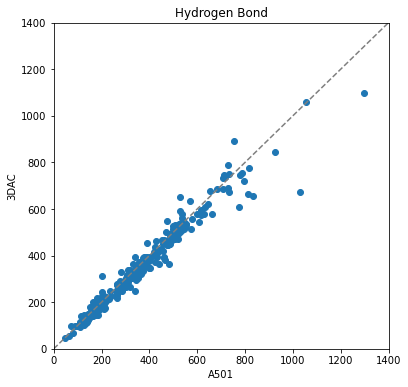

In [7]:
plt.figure(figsize=(6,6))
plt.scatter(avaiable_DF["A501_hydrogen_bond"],avaiable_DF["3DAC_hydrogen_bond"])
plt.plot([0,1400],[0,1400],linestyle="--",color="tab:gray")
plt.xlim(0,1400)
plt.ylim(0,1400)
plt.xlabel("A501")
plt.ylabel("3DAC")
plt.title("Hydrogen Bond")
plt.savefig("Figure/Hbond.png",dpi=300)

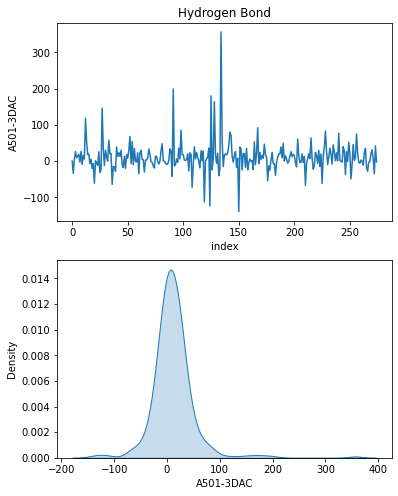

In [8]:
plt.figure(figsize=(6,8))
plt.subplot(211)
plt.plot(np.array(avaiable_DF["A501_hydrogen_bond"])-np.array(avaiable_DF["3DAC_hydrogen_bond"]))
plt.ylabel("A501-3DAC")
plt.title("Hydrogen Bond")
plt.xlabel("index")

plt.subplot(212)
sns.kdeplot(np.array(avaiable_DF["A501_hydrogen_bond"])-np.array(avaiable_DF["3DAC_hydrogen_bond"]),shade=True)
plt.xlabel("A501-3DAC")

plt.savefig("Figure/Hbond2.png",dpi=300)

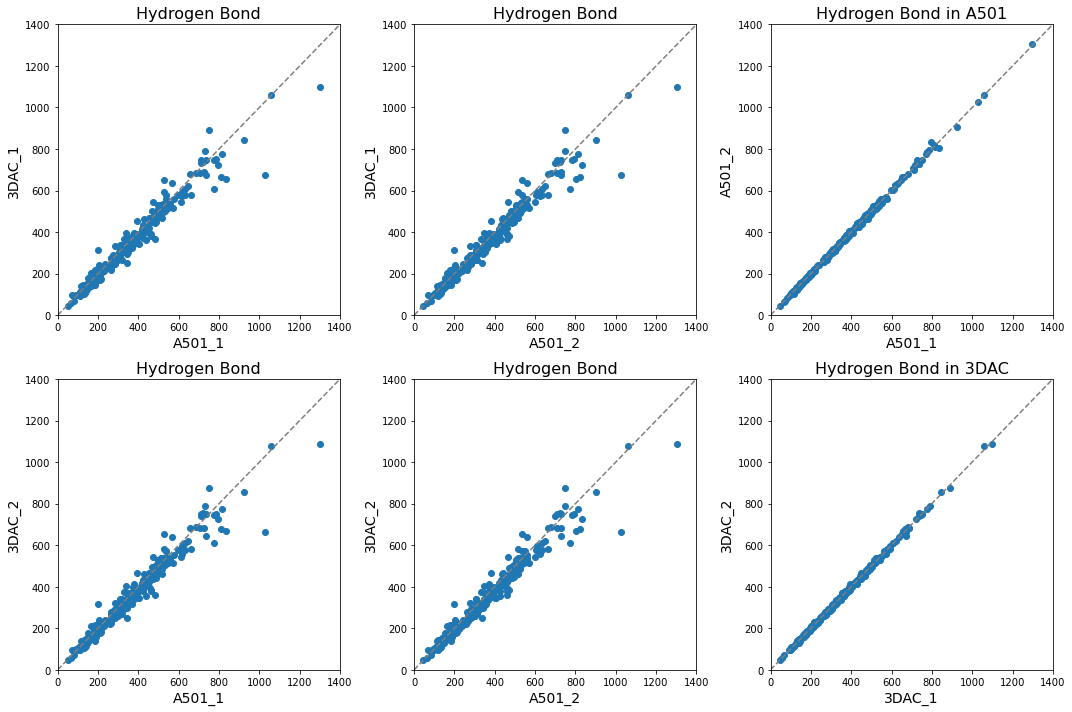

In [9]:
plt.figure(figsize=(15,10))
plt.subplot(231)
plt.scatter(hbond_A501_list,hbond_3DAC_list)
plt.plot([0,1400],[0,1400],linestyle="--",color="tab:gray")
plt.xlim(0,1400)
plt.ylim(0,1400)
plt.xlabel("A501_1",fontsize=14)
plt.ylabel("3DAC_1",fontsize=14)
plt.title("Hydrogen Bond",fontsize=16)

plt.subplot(232)
plt.scatter(hbond_A501_list_2,hbond_3DAC_list)
plt.plot([0,1400],[0,1400],linestyle="--",color="tab:gray")
plt.xlim(0,1400)
plt.ylim(0,1400)
plt.xlabel("A501_2",fontsize=14)
plt.ylabel("3DAC_1",fontsize=14)
plt.title("Hydrogen Bond",fontsize=16)

plt.subplot(233)
plt.scatter(hbond_A501_list,hbond_A501_list_2)
plt.plot([0,1400],[0,1400],linestyle="--",color="tab:gray")
plt.xlim(0,1400)
plt.ylim(0,1400)
plt.xlabel("A501_1",fontsize=14)
plt.ylabel("A501_2",fontsize=14)
plt.title("Hydrogen Bond in A501",fontsize=16)


plt.subplot(234)
plt.scatter(hbond_A501_list,hbond_3DAC_list_2)
plt.plot([0,1400],[0,1400],linestyle="--",color="tab:gray")
plt.xlim(0,1400)
plt.ylim(0,1400)
plt.xlabel("A501_1",fontsize=14)
plt.ylabel("3DAC_2",fontsize=14)
plt.title("Hydrogen Bond",fontsize=16)


plt.subplot(235)
plt.scatter(hbond_A501_list_2,hbond_3DAC_list_2)
plt.plot([0,1400],[0,1400],linestyle="--",color="tab:gray")
plt.xlim(0,1400)
plt.ylim(0,1400)
plt.xlabel("A501_2",fontsize=14)
plt.ylabel("3DAC_2",fontsize=14)
plt.title("Hydrogen Bond",fontsize=16)

plt.subplot(236)
plt.scatter(hbond_3DAC_list,hbond_3DAC_list_2)
plt.plot([0,1400],[0,1400],linestyle="--",color="tab:gray")
plt.xlim(0,1400)
plt.ylim(0,1400)
plt.xlabel("3DAC_1",fontsize=14)
plt.ylabel("3DAC_2",fontsize=14)
plt.title("Hydrogen Bond in 3DAC",fontsize=16)

plt.tight_layout()

plt.savefig("Figure/Hbond_new.png",dpi=300)

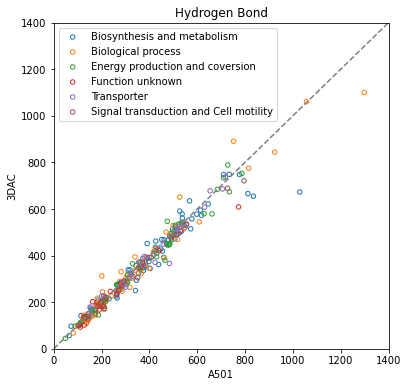

In [10]:
plt.figure(figsize=(6,6))
plt.scatter(avaiable_DF[avaiable_DF["Function_tag"]=="Biosynthesis and metabolism"]["A501_hydrogen_bond"],
            avaiable_DF[avaiable_DF["Function_tag"]=="Biosynthesis and metabolism"]["3DAC_hydrogen_bond"],
            label="Biosynthesis and metabolism",
            edgecolors="tab:blue",
            color="None",
            s=20)

plt.scatter(avaiable_DF[avaiable_DF["Function_tag"]=="Biological process"]["A501_hydrogen_bond"],
            avaiable_DF[avaiable_DF["Function_tag"]=="Biological process"]["3DAC_hydrogen_bond"],
            label="Biological process",
            edgecolors="tab:orange",
            color="None",
            s=20)

plt.scatter(avaiable_DF[avaiable_DF["Function_tag"]=="Energy production and coversion"]["A501_hydrogen_bond"],
            avaiable_DF[avaiable_DF["Function_tag"]=="Energy production and coversion"]["3DAC_hydrogen_bond"],
            label="Energy production and coversion",
            edgecolors="tab:green",
            color="None",
            s=20)

plt.scatter(avaiable_DF[avaiable_DF["Function_tag"]=="Function unknown"]["A501_hydrogen_bond"],
            avaiable_DF[avaiable_DF["Function_tag"]=="Function unknown"]["3DAC_hydrogen_bond"],
            label="Function unknown",
            edgecolors="tab:red",
            color="None",
            s=20)

plt.scatter(avaiable_DF[avaiable_DF["Function_tag"]=="Transporter"]["A501_hydrogen_bond"],
            avaiable_DF[avaiable_DF["Function_tag"]=="Transporter"]["3DAC_hydrogen_bond"],
            label="Transporter",
            edgecolors="tab:purple",
            color="None",
            s=20)

plt.scatter(avaiable_DF[avaiable_DF["Function_tag"]=="Signal transduction and Cell motility"]["A501_hydrogen_bond"],
            avaiable_DF[avaiable_DF["Function_tag"]=="Signal transduction and Cell motility"]["3DAC_hydrogen_bond"],
            label="Signal transduction and Cell motility",
            edgecolors="tab:brown",
            color="None",
            s=20)

plt.plot([0,1400],[0,1400],linestyle="--",color="tab:gray")
plt.xlim(0,1400)
plt.ylim(0,1400)
plt.legend()
plt.xlabel("A501")
plt.ylabel("3DAC")
plt.title("Hydrogen Bond")
plt.savefig("Figure/Hbond.png",dpi=300)

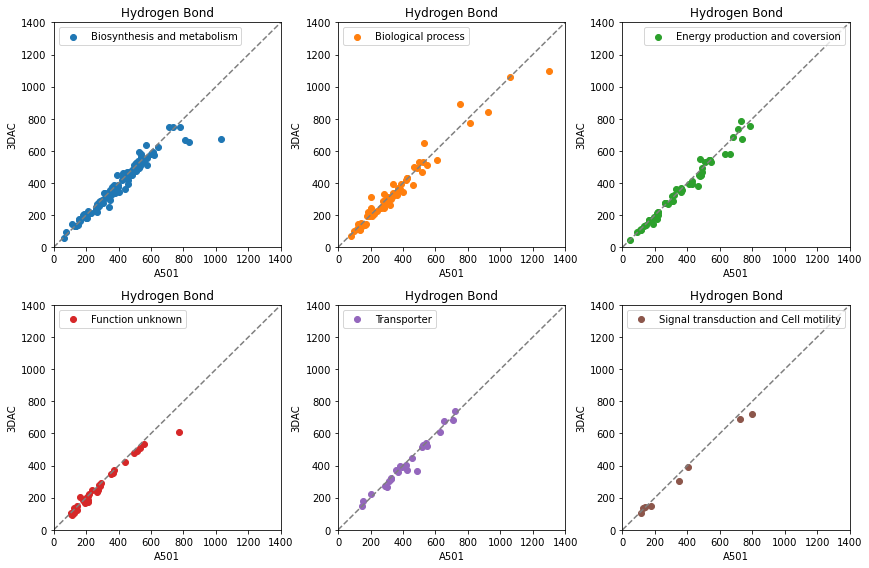

In [11]:
plt.figure(figsize=(12,8))

plt.subplot(231)
plt.scatter(avaiable_DF[avaiable_DF["Function_tag"]=="Biosynthesis and metabolism"]["A501_hydrogen_bond"],
            avaiable_DF[avaiable_DF["Function_tag"]=="Biosynthesis and metabolism"]["3DAC_hydrogen_bond"],
            label="Biosynthesis and metabolism",
            color="tab:blue")
plt.plot([0,1400],[0,1400],linestyle="--",color="tab:gray")
plt.xlim(0,1400)
plt.ylim(0,1400)
plt.legend()
plt.xlabel("A501")
plt.ylabel("3DAC")
plt.title("Hydrogen Bond")


plt.subplot(232)
plt.scatter(avaiable_DF[avaiable_DF["Function_tag"]=="Biological process"]["A501_hydrogen_bond"],
            avaiable_DF[avaiable_DF["Function_tag"]=="Biological process"]["3DAC_hydrogen_bond"],
            label="Biological process",
            color="tab:orange")
plt.plot([0,1400],[0,1400],linestyle="--",color="tab:gray")
plt.xlim(0,1400)
plt.ylim(0,1400)
plt.legend()
plt.xlabel("A501")
plt.ylabel("3DAC")
plt.title("Hydrogen Bond")


plt.subplot(233)
plt.scatter(avaiable_DF[avaiable_DF["Function_tag"]=="Energy production and coversion"]["A501_hydrogen_bond"],
            avaiable_DF[avaiable_DF["Function_tag"]=="Energy production and coversion"]["3DAC_hydrogen_bond"],
            label="Energy production and coversion",
            color="tab:green")
plt.plot([0,1400],[0,1400],linestyle="--",color="tab:gray")
plt.xlim(0,1400)
plt.ylim(0,1400)
plt.legend()
plt.xlabel("A501")
plt.ylabel("3DAC")
plt.title("Hydrogen Bond")


plt.subplot(234)
plt.scatter(avaiable_DF[avaiable_DF["Function_tag"]=="Function unknown"]["A501_hydrogen_bond"],
            avaiable_DF[avaiable_DF["Function_tag"]=="Function unknown"]["3DAC_hydrogen_bond"],
            label="Function unknown",
            color="tab:red")
plt.plot([0,1400],[0,1400],linestyle="--",color="tab:gray")
plt.xlim(0,1400)
plt.ylim(0,1400)
plt.legend()
plt.xlabel("A501")
plt.ylabel("3DAC")
plt.title("Hydrogen Bond")


plt.subplot(235)
plt.scatter(avaiable_DF[avaiable_DF["Function_tag"]=="Transporter"]["A501_hydrogen_bond"],
            avaiable_DF[avaiable_DF["Function_tag"]=="Transporter"]["3DAC_hydrogen_bond"],
            label="Transporter",
            color="tab:purple")
plt.plot([0,1400],[0,1400],linestyle="--",color="tab:gray")
plt.xlim(0,1400)
plt.ylim(0,1400)
plt.legend()
plt.xlabel("A501")
plt.ylabel("3DAC")
plt.title("Hydrogen Bond")


plt.subplot(236)
plt.scatter(avaiable_DF[avaiable_DF["Function_tag"]=="Signal transduction and Cell motility"]["A501_hydrogen_bond"],
            avaiable_DF[avaiable_DF["Function_tag"]=="Signal transduction and Cell motility"]["3DAC_hydrogen_bond"],
            label="Signal transduction and Cell motility",
            color="tab:brown")
plt.plot([0,1400],[0,1400],linestyle="--",color="tab:gray")
plt.xlim(0,1400)
plt.ylim(0,1400)
plt.legend()
plt.xlabel("A501")
plt.ylabel("3DAC")
plt.title("Hydrogen Bond")

plt.tight_layout()
plt.savefig("Figure/Hbond_full.png",dpi=300)